In [1]:
from importlib import reload
from my_functions import read_data
from my_functions import data_visualization as dv
from my_functions import my_svr
from my_functions import my_errors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load elec and weather data

hhy 3-22 3-23 missing

In [2]:
#elec_data_path = './elec_data/hac.xlsx'
elec_data_path = './elec_data/hhy.xlsx'
#weather_data_path = './weather_data/weather_data_20170201-20170331.csv'
weather_data_path = './weather_data/weather_data_20170201-20170422_Shaoguan.csv'

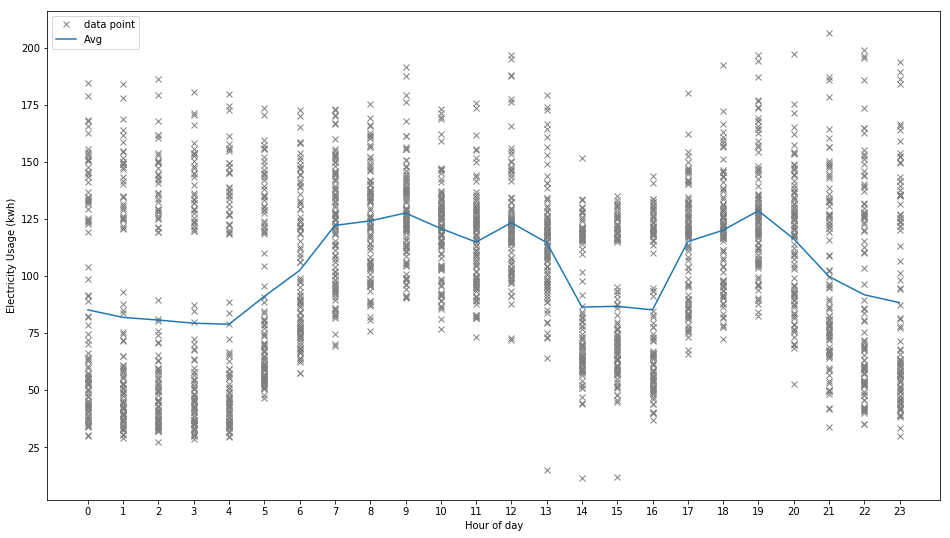

In [3]:
elec = read_data.elec(elec_data_path)
dv.plot_elec(elec)

In [4]:
weather = read_data.weather(weather_data_path)

In [5]:
big_data = read_data.merge_elec_and_weather(elec, weather, startDate='2/1/2017', endDate='3/31/2017')

In [6]:
# Only keep kwh and tempm and hum
elec_and_weather = read_data.drop_col(big_data, keep_columns=['kwh', 'tempm', 'hum'])

In [7]:
elec_and_weather.head()

,kwh,hum,tempm
stat_time,,,
2017-02-01 00:00:00,165.950,83.0,10.0
2017-02-01 01:00:00,161.700,83.0,10.0
2017-02-01 02:00:00,160.450,83.0,10.0
2017-02-01 03:00:00,154.075,84.0,11.0
2017-02-01 04:00:00,157.825,84.0,11.0


elec data have NA values

In [8]:
elec_and_weather[elec_and_weather.kwh.isnull()].index

DatetimeIndex(['2017-03-22 00:00:00', '2017-03-22 01:00:00',
               '2017-03-22 02:00:00', '2017-03-22 03:00:00',
               '2017-03-22 04:00:00', '2017-03-22 05:00:00',
               '2017-03-22 06:00:00', '2017-03-22 07:00:00',
               '2017-03-22 08:00:00', '2017-03-22 09:00:00',
               '2017-03-22 10:00:00', '2017-03-22 11:00:00',
               '2017-03-22 12:00:00', '2017-03-22 13:00:00',
               '2017-03-22 14:00:00', '2017-03-22 15:00:00',
               '2017-03-22 16:00:00', '2017-03-22 17:00:00',
               '2017-03-22 18:00:00', '2017-03-22 19:00:00',
               '2017-03-22 20:00:00', '2017-03-22 21:00:00',
               '2017-03-22 22:00:00', '2017-03-22 23:00:00',
               '2017-03-23 00:00:00', '2017-03-23 01:00:00',
               '2017-03-23 02:00:00', '2017-03-23 03:00:00',
               '2017-03-23 04:00:00', '2017-03-23 05:00:00',
               '2017-03-23 06:00:00', '2017-03-23 07:00:00',
               '2017-03-

# Explore the data

## compare elec usage on weekday and weekends

In [9]:
WkdayWkend_Hour = elec_and_weather.groupby([elec_and_weather.index.dayofweek >= 5,
                                                elec_and_weather.index.hour])
    # Calculate an average weekday and average weekend by hour (electricity
    # and outdoor temp)
AvgDay = pd.DataFrame([WkdayWkend_Hour['kwh'].mean(),
                           WkdayWkend_Hour['tempm'].mean()])

In [10]:
AvgDay

False                                                         \
              0          1          2          3          4          5    
kwh    81.569457  76.715227  75.493241  73.675829  73.710228  87.017118   
tempm  12.372093  12.372093  12.372093  11.906977  11.906977  11.906977   

                                                         ...          True   \
               6           7           8           9     ...             14   
kwh    100.489468  123.859283  122.486714  121.842611    ...      83.747496   
tempm   12.186047   12.186047   12.186047   14.930233    ...      17.250000   

                                                                            \
             15         16          17          18          19          20   
kwh    80.50883  77.297593  115.931607  121.641078  132.370918  114.243718   
tempm  17.87500  17.875000   17.875000   14.812500   14.812500   14.812500   

                                       
             21         22         23  
kwh    89.04608  77.182008  73.568225  
tempm  13.75000  13.750000  13.750000  

[2 rows x 48 columns]

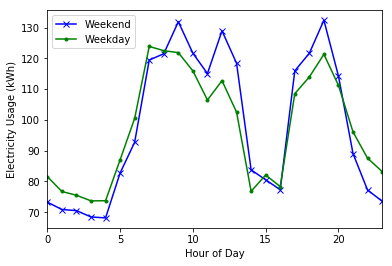

In [11]:
dv.compare_weekday_weekend(elec_and_weather)

## plot elec usage and temperature

                            OLS Regression Results                            
Dep. Variable:                    kwh   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           2.77e-32
Time:                        17:38:32   Log-Likelihood:                -6769.0
No. Observations:                1368   AIC:                         1.354e+04
Df Residuals:                    1366   BIC:                         1.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        129.6692      2.813     46.097      0.0

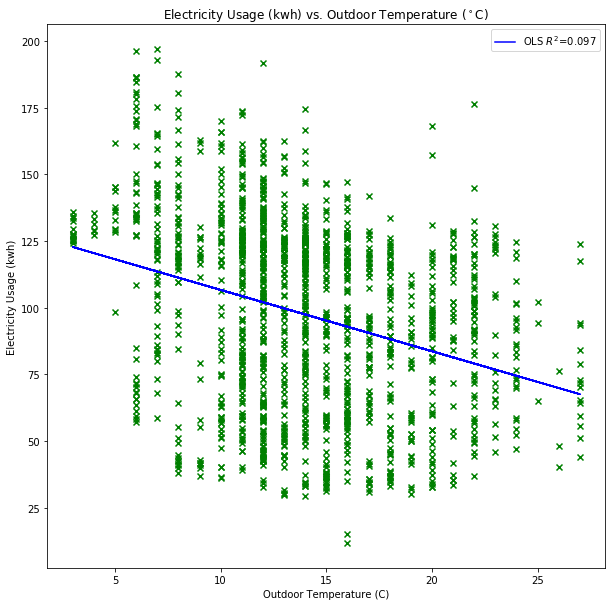

In [12]:
dv.compare_elec_temp(elec_and_weather.dropna())

## correlation between elec usage at t and t-k

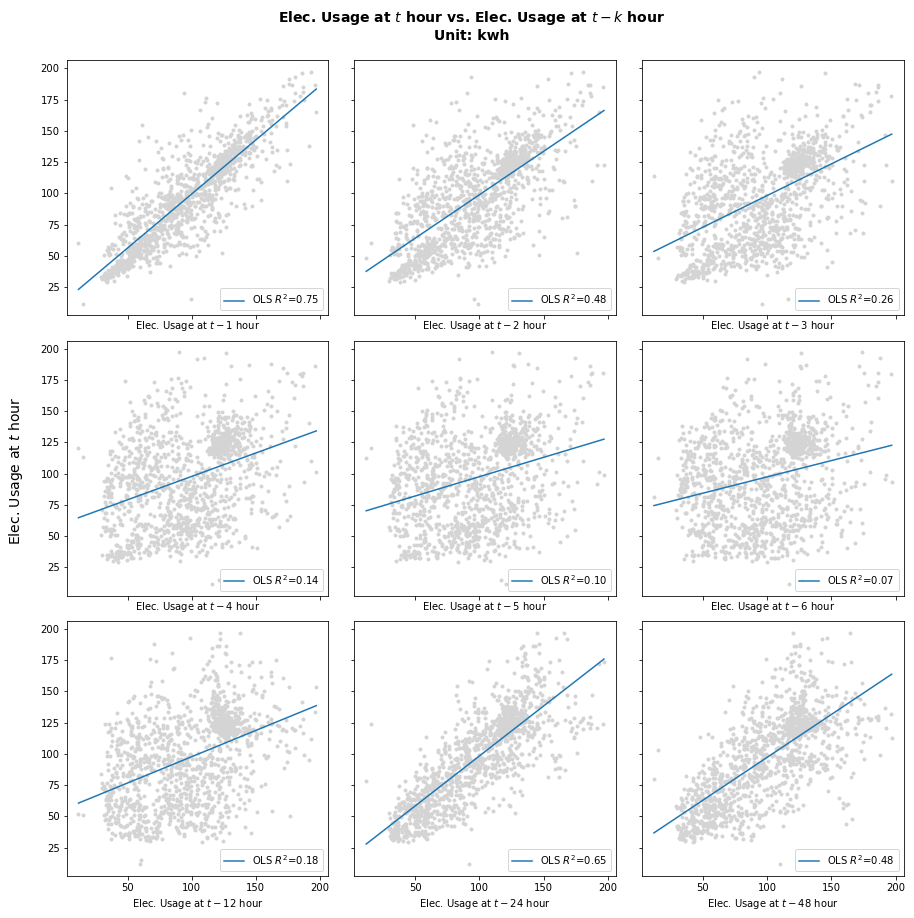

In [13]:
my_svr.add_historical_kwh(elec_and_weather)
dv.compare_t_t_k(elec_and_weather.dropna())

# SVR

**About scaling data**
How to scale the data?
Should I scale the data first then split it into two sets, or split it first and perform scaling separately?
Should i use robus_scale because i may have outliers in my dataset

Maybe I should scale kwh and temperature first, and add other features after because they are already 1/0s.

**About spliting the data**
Should I split the data manually or use sklearn.model_selection.train_test_split.
This is actually a time series prediction problem, use sklearn module will shuffle the data randomly, so the time information contained in the data will be erased maybe?

## add features -> scale -> split

In [14]:
elec_and_weather.head()

,kwh,hum,tempm,kwh_t-1,kwh_t-2,kwh_t-3,kwh_t-4,kwh_t-5,kwh_t-6,kwh_t-12,kwh_t-24,kwh_t-48
stat_time,,,,,,,,,,,,
2017-02-01 00:00:00,165.950,83.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 01:00:00,161.700,83.0,10.0,165.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 02:00:00,160.450,83.0,10.0,161.700,165.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 03:00:00,154.075,84.0,11.0,160.450,161.70,165.95,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 04:00:00,157.825,84.0,11.0,154.075,160.45,161.70,165.95,NaN,NaN,NaN,NaN,NaN


In [15]:
my_svr.add_if_holiday(elec_and_weather)
my_svr.add_hour_of_day(elec_and_weather)
elec_and_weather.head()

,kwh,hum,tempm,kwh_t-1,kwh_t-2,kwh_t-3,kwh_t-4,kwh_t-5,kwh_t-6,kwh_t-12,...,14,15,16,17,18,19,20,21,22,23
stat_time,,,,,,,,,,,,,,,,,,,,,
2017-02-01 00:00:00,165.950,83.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 01:00:00,161.700,83.0,10.0,165.950,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 02:00:00,160.450,83.0,10.0,161.700,165.95,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 03:00:00,154.075,84.0,11.0,160.450,161.70,165.95,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 04:00:00,157.825,84.0,11.0,154.075,160.45,161.70,165.95,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [16]:
t = ['2/15/2017', '3/21/2017', '3/25/2017', '3/31/2017']
drop_col = ['kwh_t-2', 'kwh_t-3', 'kwh_t-4', 'kwh_t-5', 'kwh_t-6', 'kwh_t-12', 'kwh_t-48']
X_train, y_train, X_test, y_test = my_svr.split(elec_and_weather, t, drop_col)

### scale together

In [17]:
reload(dv)

<module 'my_functions.data_visualization' from 'D:\\Study\\mierda\\data\\load_forecast\\my_functions\\data_visualization.py'>

In [18]:
scaler = preprocessing.StandardScaler().fit(X_train.append(X_test))

In [19]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = svm.SVR(kernel='linear', C=100).fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

{'RMSE': 10.717258475890812, 'MAE': 7.7371575546107403, 'MAPE': 9.730035450695782}


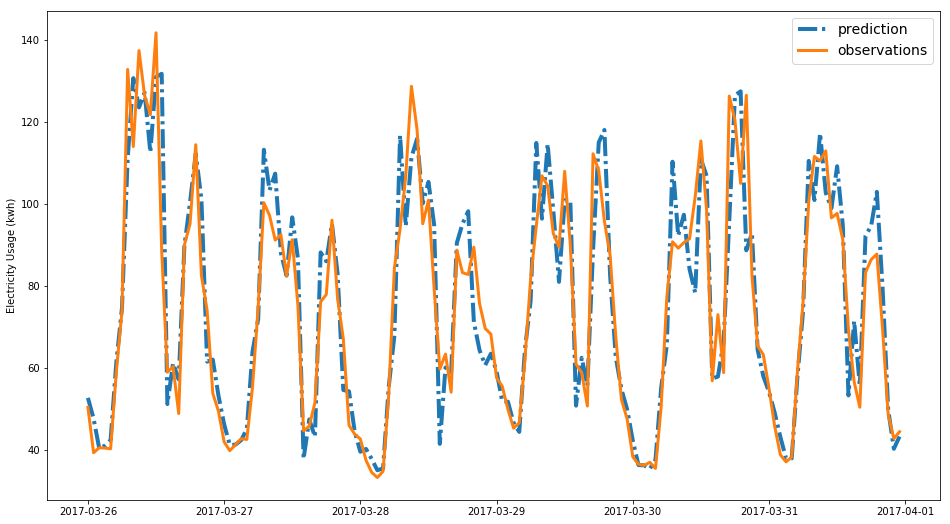

In [21]:
dv.plot_pred(X_test, y_test, pred)

In [22]:
plt.close('all')

{'RMSE': 10.218582273199946, 'MAE': 7.331643813276874, 'MAPE': 9.3566016372202867}


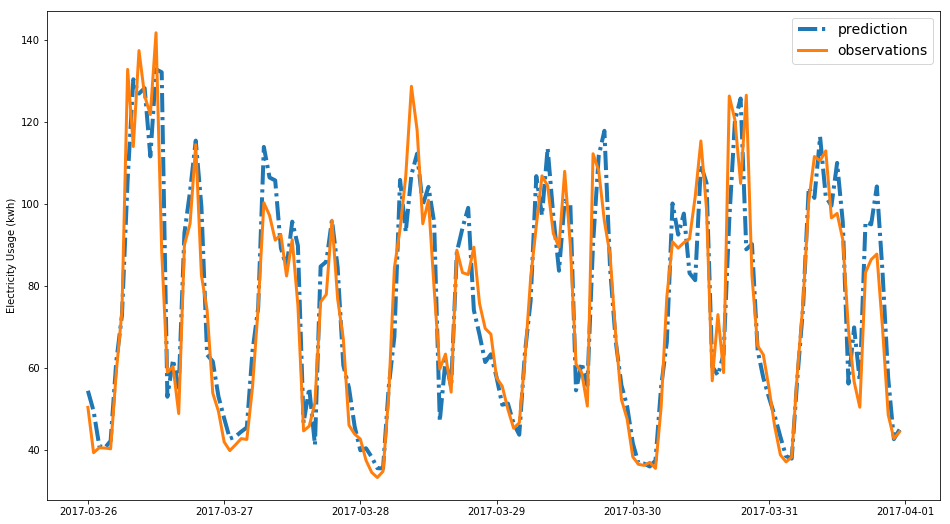

In [23]:
model_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.005).fit(X_train_scaled, y_train)
pred_rbf = model_rbf.predict(X_test_scaled)
dv.plot_pred(X_test, y_test, pred_rbf)

{'RMSE': 11.204451596073532, 'MAE': 7.9314072105955802, 'MAPE': 10.431079317793159}


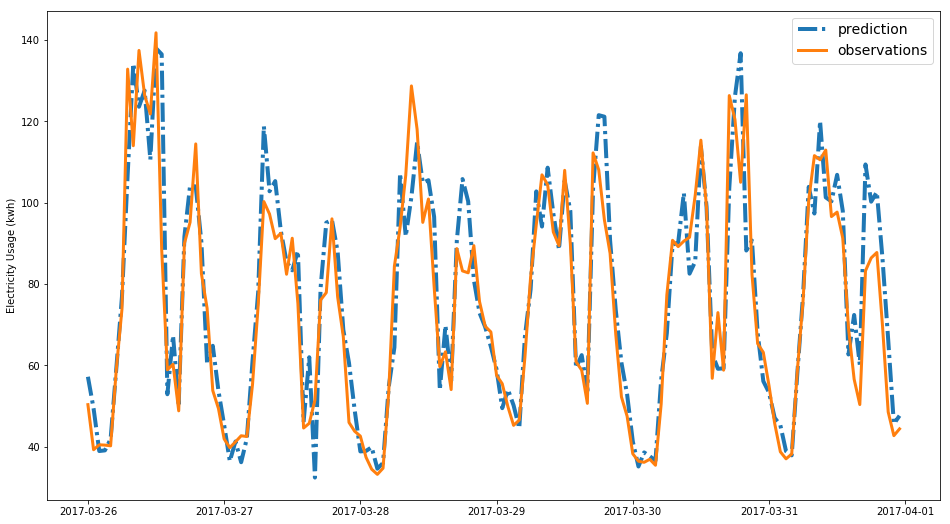

In [24]:
model_poly = svm.SVR(kernel='poly', C=100, degree=3).fit(X_train_scaled, y_train)
pred_poly = model_poly.predict(X_test_scaled)
dv.plot_pred(X_test, y_test, pred_poly)

In [25]:
print('Linear: \t', my_errors.errors(y_test, pred))
print('RBF: \t\t', my_errors.errors(y_test, pred_rbf))
print('Polynomial: \t', my_errors.errors(y_test, pred_poly))

Linear: 	 {'RMSE': 10.717258475890812, 'MAE': 7.7371575546107403, 'MAPE': 9.730035450695782}
RBF: 		 {'RMSE': 10.218582273199946, 'MAE': 7.331643813276874, 'MAPE': 9.3566016372202867}
Polynomial: 	 {'RMSE': 11.204451596073532, 'MAE': 7.9314072105955802, 'MAPE': 10.431079317793159}


**RBF may be the best choice**

## add features -> split -> scale

In [26]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

{'RMSE': 19.972955597575755, 'MAE': 16.105993879382677, 'MAPE': 21.546373432636955}


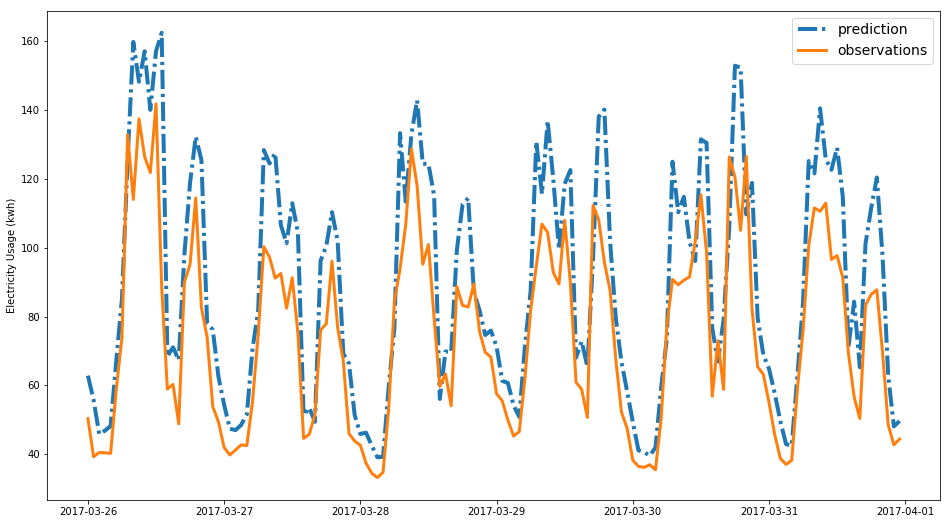

In [27]:
model2 = svm.SVR(kernel='linear', C=100).fit(X_train_scaled, y_train)
pred2 = model2.predict(X_test_scaled)
dv.plot_pred(X_test, y_test, pred2)

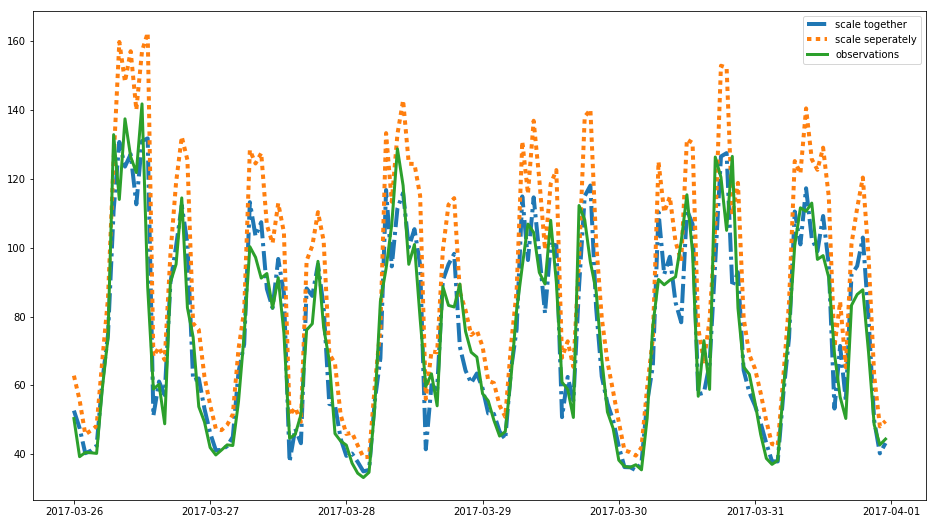

In [28]:
# aweful graph
plt.close('all')
fig = plt.figure(figsize=(16, 9))
plt.plot(X_test.index, pred, linestyle='-.', lw=4, label='scale together')
plt.plot(X_test.index, pred2, linestyle=':', lw=4, label='scale seperately')
plt.plot(X_test.index, y_test, lw=3, label='observations')
plt.legend()

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.OLS(y_test, sm.add_constant(pred))
res = model.fit()

model = sm.OLS(y_test, sm.add_constant(pred2))
res2 = model.fit()

(<matplotlib.legend.Legend at 0x1a04e5107b8>,)

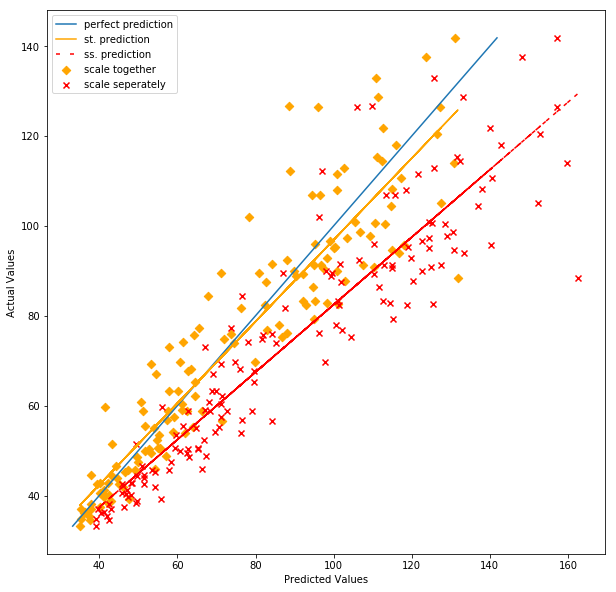

In [31]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.scatter(pred, y_test, marker='D', color='orange', label='scale together')
plt.scatter(pred2, y_test, marker='x', color='red', label='scale seperately')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='perfect prediction')

plt.plot(pred, res.fittedvalues, color='orange', label='st. prediction')
plt.plot(pred2, res2.fittedvalues, color='red', linestyle='--', dashes=(2, 5), label='ss. prediction')

plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.legend(loc='upper left'), 

In [32]:
print(my_errors.errors(y_test, pred)) # scale together
print(my_errors.errors(y_test, pred2)) # scale seperately

{'RMSE': 10.717258475890812, 'MAE': 7.7371575546107403, 'MAPE': 9.730035450695782}
{'RMSE': 19.972955597575755, 'MAE': 16.105993879382677, 'MAPE': 21.546373432636955}


**The error values say you should scale the data together**

## Scale together -> add features (1/0s) -> split

In [33]:
elec_and_weather = read_data.drop_col(big_data, keep_columns=['kwh', 'hum', 'tempm'])
elec_and_weather.head()

,kwh,hum,tempm
stat_time,,,
2017-02-01 00:00:00,165.950,83.0,10.0
2017-02-01 01:00:00,161.700,83.0,10.0
2017-02-01 02:00:00,160.450,83.0,10.0
2017-02-01 03:00:00,154.075,84.0,11.0
2017-02-01 04:00:00,157.825,84.0,11.0


In [34]:
my_svr.add_historical_kwh(elec_and_weather)

In [35]:
elec_and_weather.head()

,kwh,hum,tempm,kwh_t-1,kwh_t-2,kwh_t-3,kwh_t-4,kwh_t-5,kwh_t-6,kwh_t-12,kwh_t-24,kwh_t-48
stat_time,,,,,,,,,,,,
2017-02-01 00:00:00,165.950,83.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 01:00:00,161.700,83.0,10.0,165.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 02:00:00,160.450,83.0,10.0,161.700,165.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 03:00:00,154.075,84.0,11.0,160.450,161.70,165.95,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01 04:00:00,157.825,84.0,11.0,154.075,160.45,161.70,165.95,NaN,NaN,NaN,NaN,NaN


In [36]:
scaler = preprocessing.StandardScaler().fit(elec_and_weather.dropna().drop('kwh', axis=1))

In [37]:
data_scaled = scaler.transform(elec_and_weather.dropna().drop('kwh', axis=1))
data_scaled

array([[-0.18570028, -0.61224492,  1.10008127, ...,  0.67222939,
         1.58228479,  1.8573647 ],
       [-0.18570028, -0.61224492,  1.35720617, ...,  0.56302149,
         1.2291023 ,  1.73940241],
       [-0.18570028, -0.61224492,  1.4840075 , ...,  0.51722462,
         1.08223434,  1.70470761],
       ..., 
       [ 0.64700509, -0.2069493 , -0.75957754, ...,  0.37644694,
        -0.42856072, -0.87039104],
       [ 0.64700509, -0.2069493 , -1.35567285, ...,  0.44392804,
        -0.90652376, -1.29783579],
       [ 0.64700509, -0.2069493 , -1.52002113, ..., -0.01737039,
        -0.9669662 , -1.43004565]])

In [38]:
data_scaled = pd.DataFrame(data_scaled, columns=elec_and_weather.columns.drop('kwh'), index=elec_and_weather.dropna().index)

In [39]:
data_scaled.head()

,hum,tempm,kwh_t-1,kwh_t-2,kwh_t-3,kwh_t-4,kwh_t-5,kwh_t-6,kwh_t-12,kwh_t-24,kwh_t-48
stat_time,,,,,,,,,,,
2017-02-03 00:00:00,-0.185700,-0.612245,1.100081,0.880347,0.766080,0.665763,0.561736,0.595518,0.672229,1.582285,1.857365
2017-02-03 01:00:00,-0.185700,-0.612245,1.357206,1.098853,0.878942,0.764516,0.663950,0.560282,0.563021,1.229102,1.739402
2017-02-03 02:00:00,-0.185700,-0.612245,1.484007,1.356126,1.097612,0.877376,0.762640,0.662465,0.517225,1.082234,1.704708
2017-02-03 03:00:00,0.045607,-0.814893,1.360728,1.483000,1.355078,1.096042,0.875428,0.761124,0.559499,0.963341,1.527764
2017-02-03 04:00:00,0.045607,-0.814893,0.994413,1.359650,1.482048,1.353504,1.093954,0.873878,0.580636,1.005304,1.631849


In [40]:
my_svr.add_hour_of_day(data_scaled)
my_svr.add_if_holiday(data_scaled)

In [41]:
data_scaled['kwh'] = elec_and_weather.dropna()['kwh']
data_scaled.head()

,hum,tempm,kwh_t-1,kwh_t-2,kwh_t-3,kwh_t-4,kwh_t-5,kwh_t-6,kwh_t-12,kwh_t-24,...,16,17,18,19,20,21,22,23,if_holiday,kwh
stat_time,,,,,,,,,,,,,,,,,,,,,
2017-02-03 00:00:00,-0.185700,-0.612245,1.100081,0.880347,0.766080,0.665763,0.561736,0.595518,0.672229,1.582285,...,0,0,0,0,0,0,0,0,0,144.825
2017-02-03 01:00:00,-0.185700,-0.612245,1.357206,1.098853,0.878942,0.764516,0.663950,0.560282,0.563021,1.229102,...,0,0,0,0,0,0,0,0,0,149.325
2017-02-03 02:00:00,-0.185700,-0.612245,1.484007,1.356126,1.097612,0.877376,0.762640,0.662465,0.517225,1.082234,...,0,0,0,0,0,0,0,0,0,144.950
2017-02-03 03:00:00,0.045607,-0.814893,1.360728,1.483000,1.355078,1.096042,0.875428,0.761124,0.559499,0.963341,...,0,0,0,0,0,0,0,0,0,131.950
2017-02-03 04:00:00,0.045607,-0.814893,0.994413,1.359650,1.482048,1.353504,1.093954,0.873878,0.580636,1.005304,...,0,0,0,0,0,0,0,0,0,138.825


In [42]:
t = ['2/15/2017', '3/21/2017', '3/25/2017', '3/31/2017']
drop_col = ['kwh_t-2', 'kwh_t-3', 'kwh_t-4', 'kwh_t-5', 'kwh_t-6', 'kwh_t-12', 'kwh_t-48']
X_train, y_train, X_test, y_test = my_svr.split(data_scaled, t, drop_col)

In [43]:
X_train.head()

,hum,tempm,kwh_t-1,kwh_t-24,0,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,if_holiday
stat_time,,,,,,,,,,,,,,,,,,,,,
2017-02-15 00:00:00,0.785789,-1.017541,1.762266,1.274561,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 01:00:00,0.785789,-1.017541,1.864411,1.375970,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 02:00:00,0.785789,-1.017541,1.751699,1.466889,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 03:00:00,0.924574,-1.220188,1.832711,1.327014,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 04:00:00,0.924574,-1.220188,1.966557,1.330511,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# do not scale 0/1 s
model01 = svm.SVR(kernel='linear', C=100).fit(X_train, y_train)
pred01 = model01.predict(X_test)

{'RMSE': 10.685877105001843, 'MAE': 7.7131162454766695, 'MAPE': 9.6996522791296567}


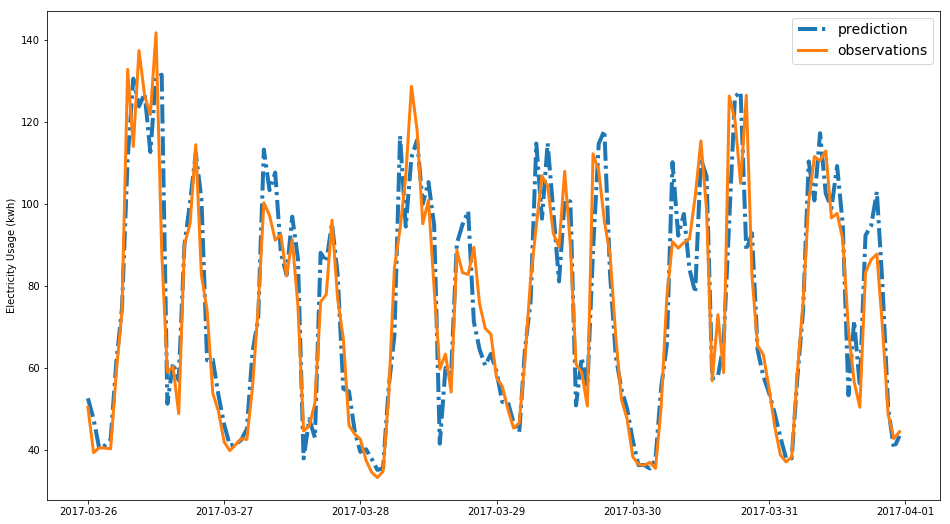

In [45]:
dv.plot_pred(X_test, y_test, pred01)

{'RMSE': 10.282536551509851, 'MAE': 7.2095888648807307, 'MAPE': 9.3365103111092509}


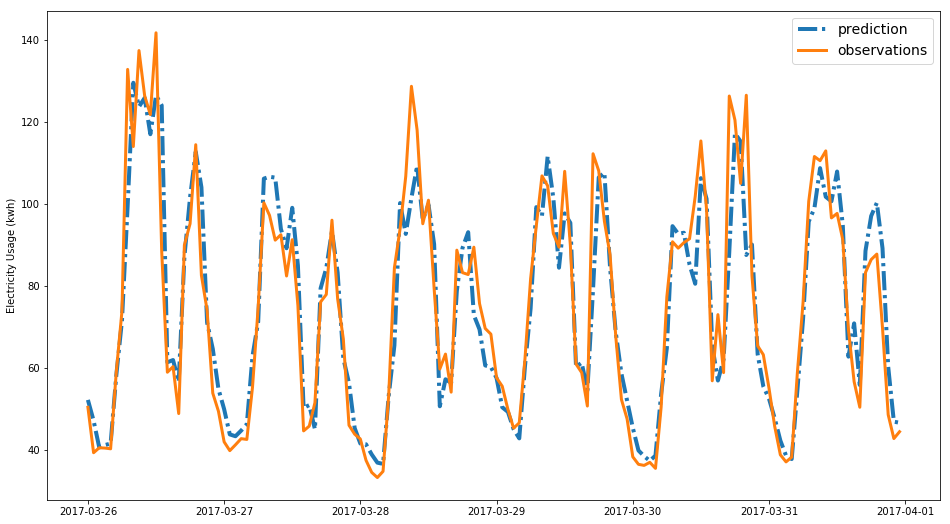

In [46]:
model01_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.005).fit(X_train, y_train)
pred01_rbf = model01_rbf.predict(X_test)
dv.plot_pred(X_test, y_test, pred01_rbf)

In [47]:
print('Scale 0/1')
print('Linear:\t', my_errors.errors(y_test, pred))
print('RBF:\t', my_errors.errors(y_test, pred_rbf))
print('Don\'t scale 0/1')
print('Linear:\t', my_errors.errors(y_test, pred01))
print('RBF:\t', my_errors.errors(y_test, pred01_rbf))

Scale 0/1
Linear:	 {'RMSE': 10.717258475890812, 'MAE': 7.7371575546107403, 'MAPE': 9.730035450695782}
RBF:	 {'RMSE': 10.218582273199946, 'MAE': 7.331643813276874, 'MAPE': 9.3566016372202867}
Don't scale 0/1
Linear:	 {'RMSE': 10.685877105001843, 'MAE': 7.7131162454766695, 'MAPE': 9.6996522791296567}
RBF:	 {'RMSE': 10.282536551509851, 'MAE': 7.2095888648807307, 'MAPE': 9.3365103111092509}


** Models perform slightly better if you don't scale those 0/1 values **

# Tuning parameters: Grid Search

In [48]:
X_train

,hum,tempm,kwh_t-1,kwh_t-24,0,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,if_holiday
stat_time,,,,,,,,,,,,,,,,,,,,,
2017-02-15 00:00:00,0.785789,-1.017541,1.762266,1.274561,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 01:00:00,0.785789,-1.017541,1.864411,1.375970,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 02:00:00,0.785789,-1.017541,1.751699,1.466889,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 03:00:00,0.924574,-1.220188,1.832711,1.327014,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 04:00:00,0.924574,-1.220188,1.966557,1.330511,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 05:00:00,0.924574,-1.220188,1.825667,1.285052,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 06:00:00,1.063358,-1.220188,1.663643,1.393455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 07:00:00,1.063358,-1.220188,1.617853,1.134687,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-15 08:00:00,1.063358,-1.220188,1.508663,1.085731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
                     'C': [1, 10, 100, 1000]}

In [57]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
for score in scores:
    print("# Tuning hyper-parameters for %s square" % score)
    print()

    clf = GridSearchCV(svm.SVR(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    #print()

# Tuning hyper-parameters for r2 square

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

-0.051 (+/-0.098) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.017 (+/-0.094) for {'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}
0.024 (+/-0.090) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.283 (+/-0.089) for {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}
0.468 (+/-0.100) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.711 (+/-0.081) for {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}
0.704 (+/-0.117) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.426 (+/-0.233) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.025 (+/-0.090) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.299 (+/-0.085) for {'C': 10, 'gamma': 0.0005, 'kernel': 'rbf'}
0.503 (+/-0.096) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.761 (+/-0.047) for {'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}
0.785 (+/-0.043) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.834 (+/-0

{'RMSE': 10.037047876073474, 'MAE': 7.2127997648805859, 'MAPE': 9.2499239415564904}


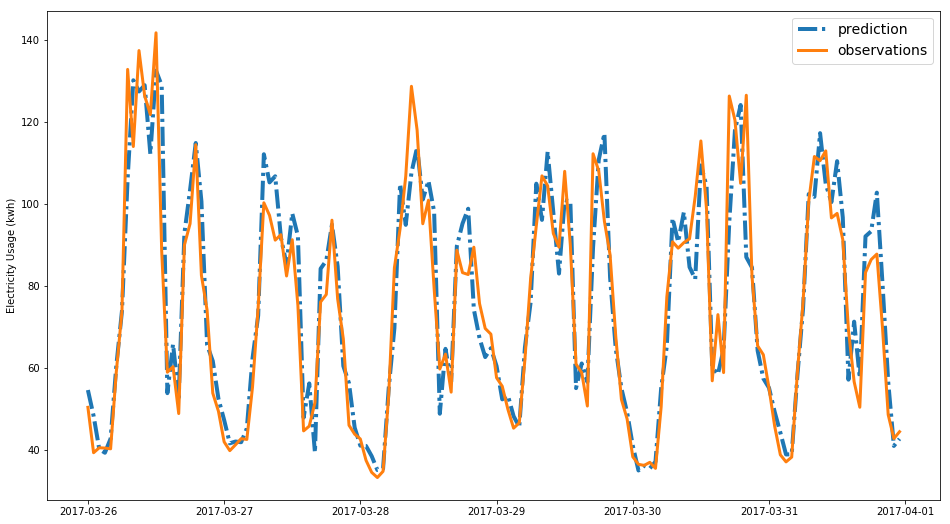

In [54]:
model_best = svm.SVR(kernel='rbf', C=1000, gamma=0.01).fit(X_train, y_train)
pred_best = model_best.predict(X_test)
dv.plot_pred(X_test, y_test, pred_best)